In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
import lightkurve as lk
from astropy.timeseries import LombScargle
import scipy.signal as signal

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Looking at CC Cet's TESS lightcurve. It's...odd. Porb = 6.82 hours.

In [3]:
hdul = fits.open('MAST_2019-11-14T1546/TESS/tess2018292075959-s0004-0000000407588360-0124-s/tess2018292075959-s0004-0000000407588360-0124-s_lc.fits')

In [4]:
data = hdul[1].data

/home/david/anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:108: LightkurveWarning: LightCurve object contains NaN times
  warnings.warn('LightCurve object contains NaN times', LightkurveWarning)


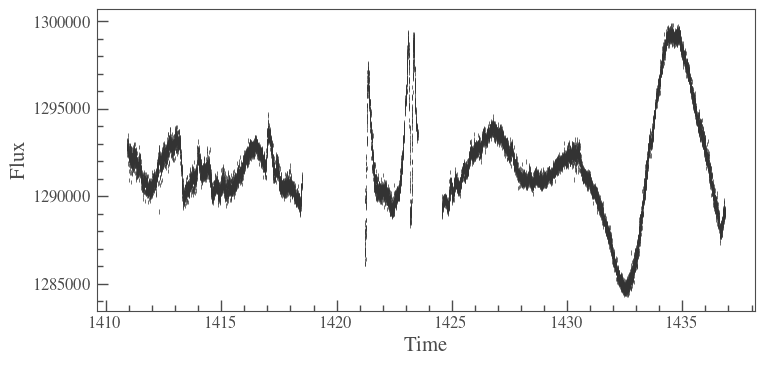

In [7]:
t, f, e, q = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY']
t, f, e = t[q==0], f[q==0], e[q==0]
lc = lk.LightCurve(time=t, flux=f, flux_err=e ).remove_outliers(sigma=5)
lc=lc.remove_nans()
lc.errorbar()

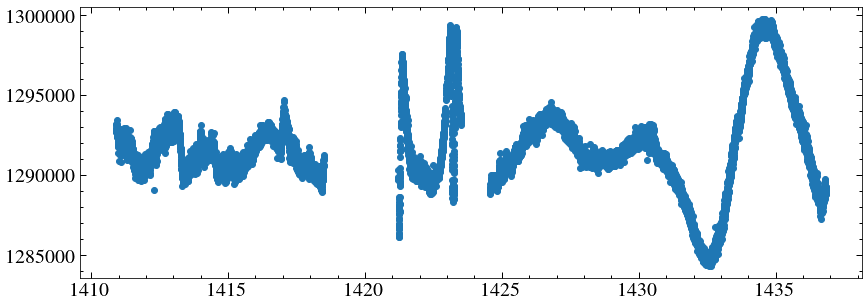

In [11]:
plt.scatter(lc.time, lc.flux)


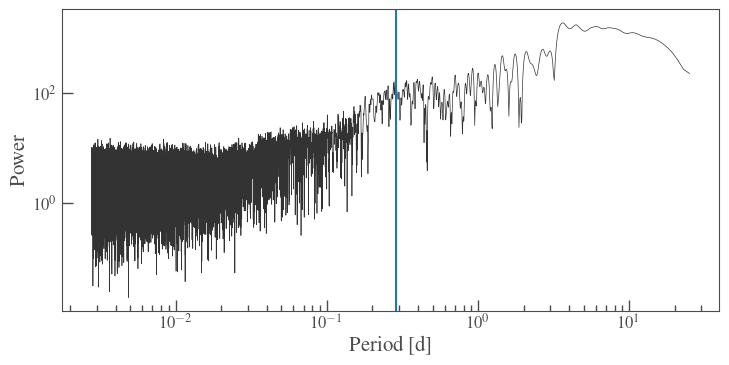

In [24]:
porb = 6.82*u.hour
pg = pg = lc.to_periodogram(oversample_factor=10,minimum_period=4*u.minute, maximum_period=25*u.day)
pg.plot(scale='log')
plt.axvline(porb.to(u.day).value)

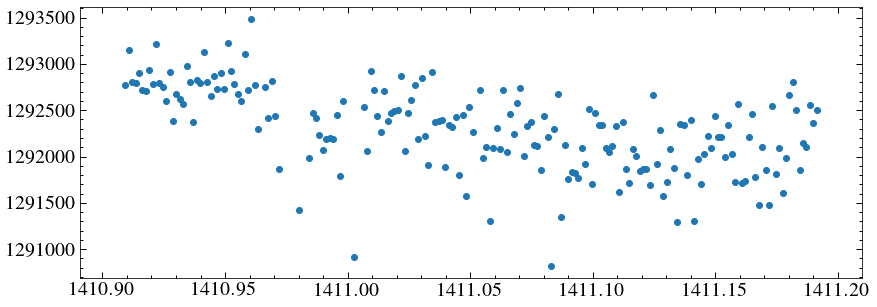

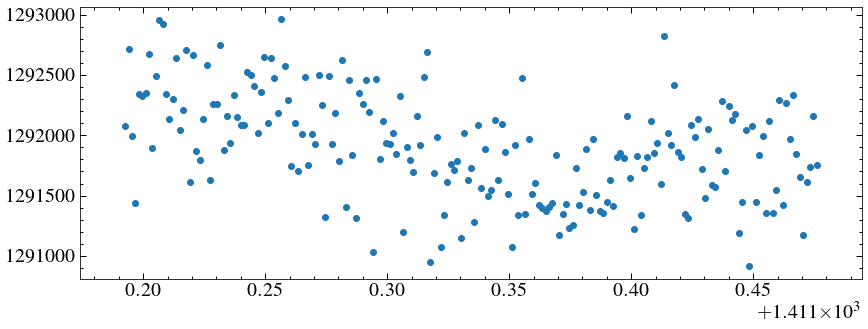

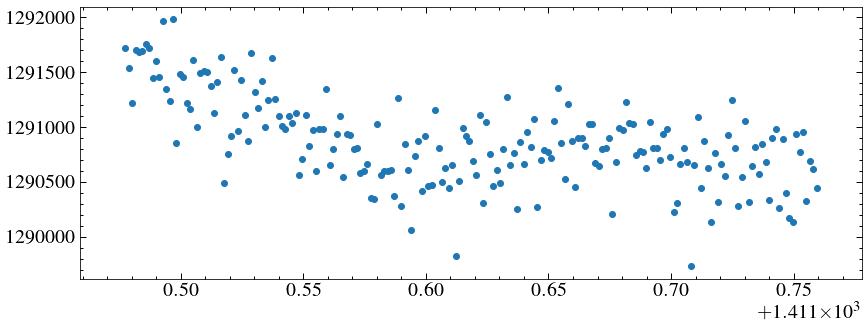

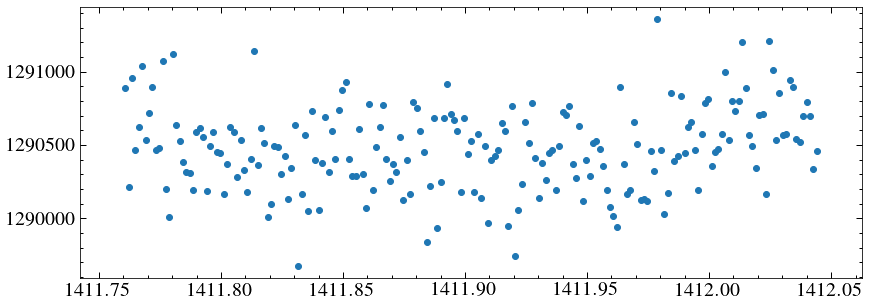

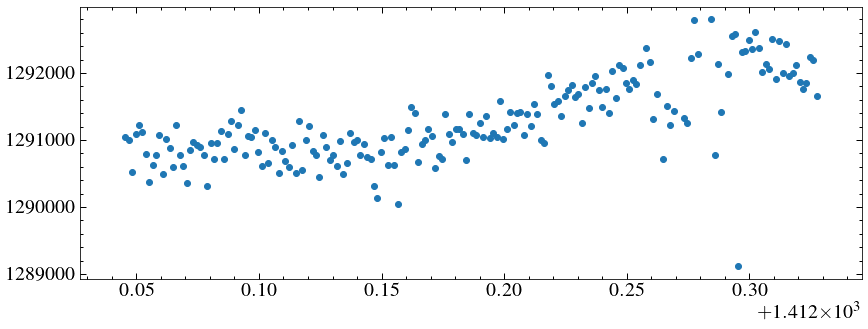

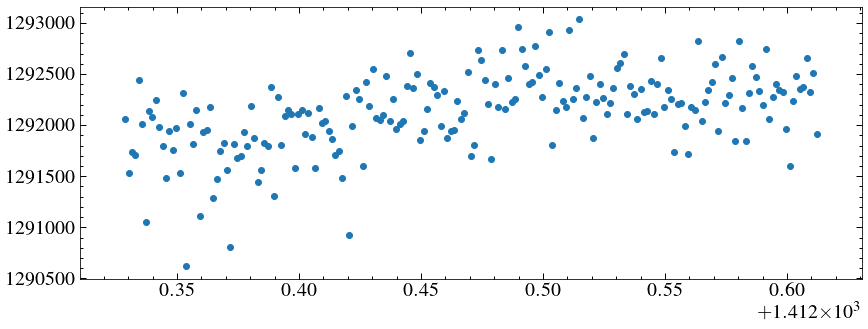

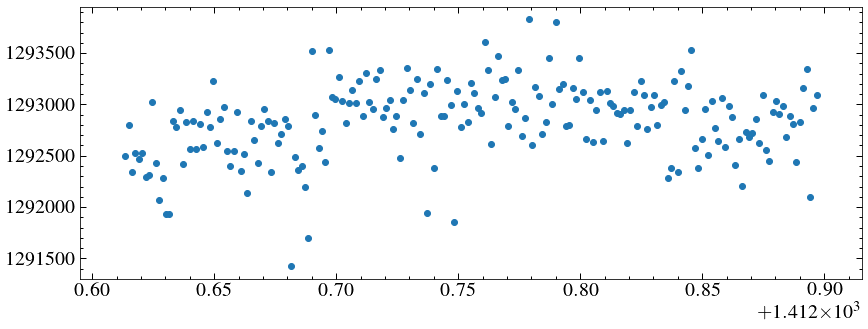

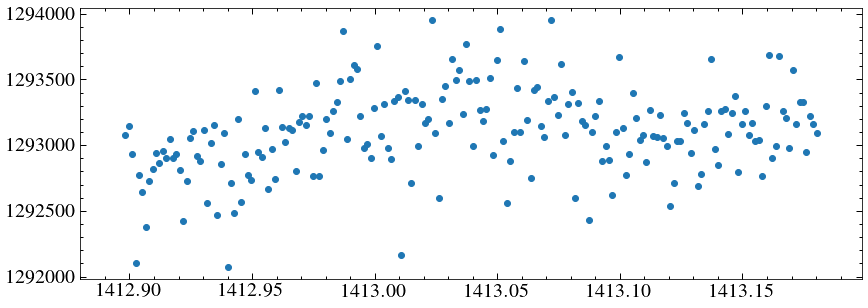

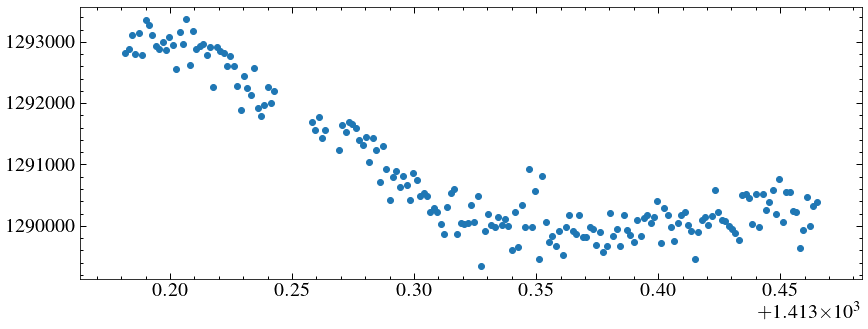

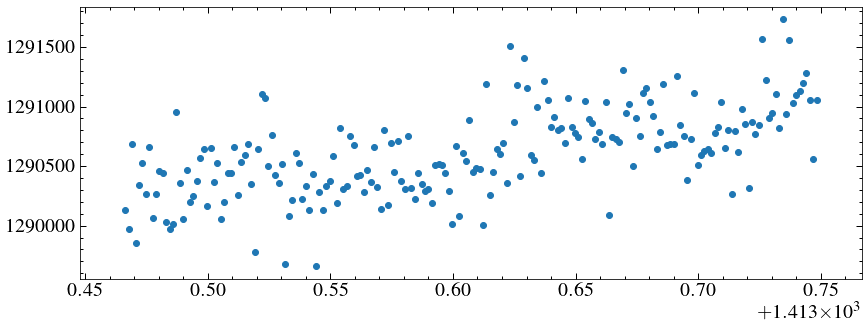

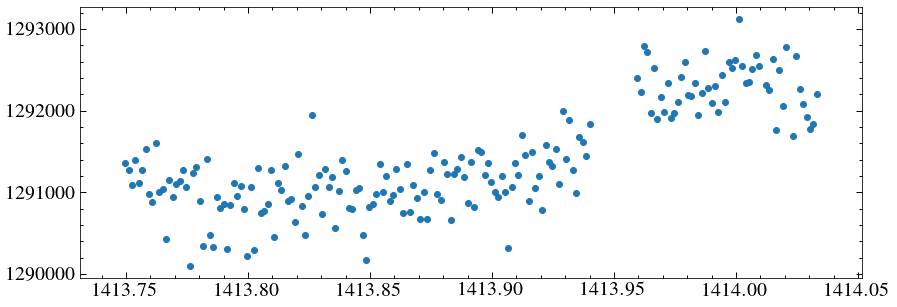

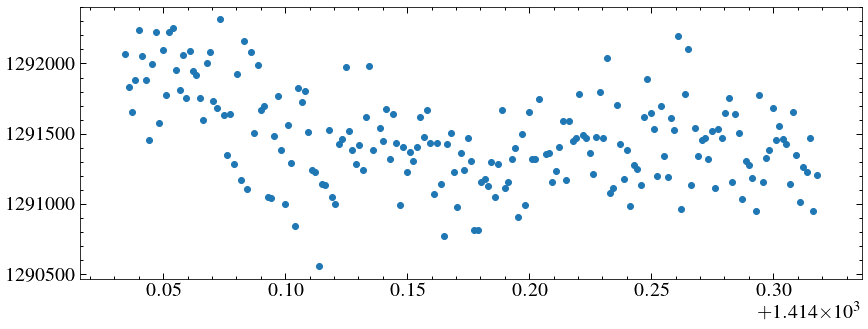

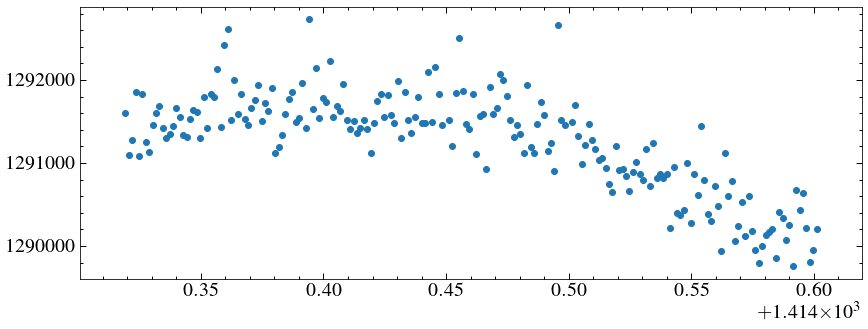

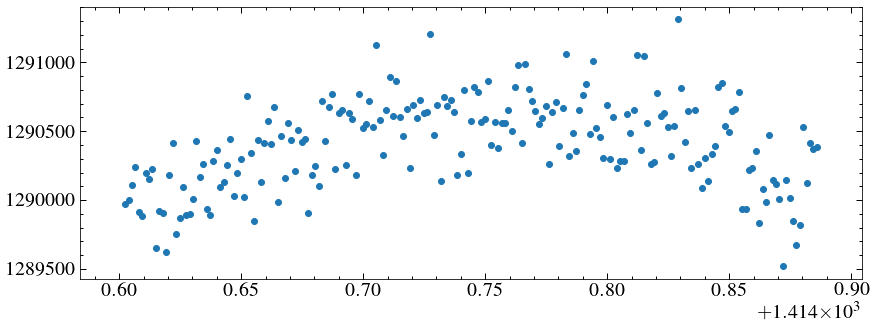

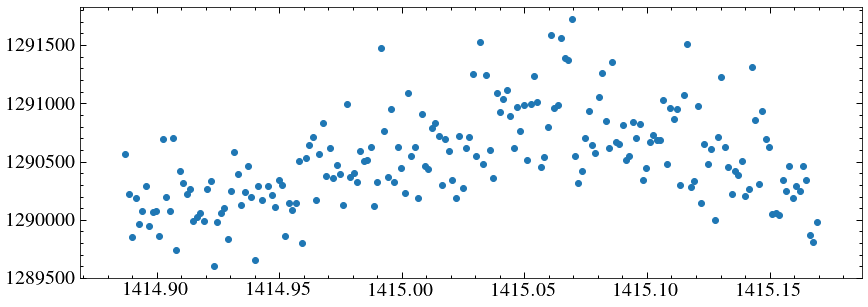

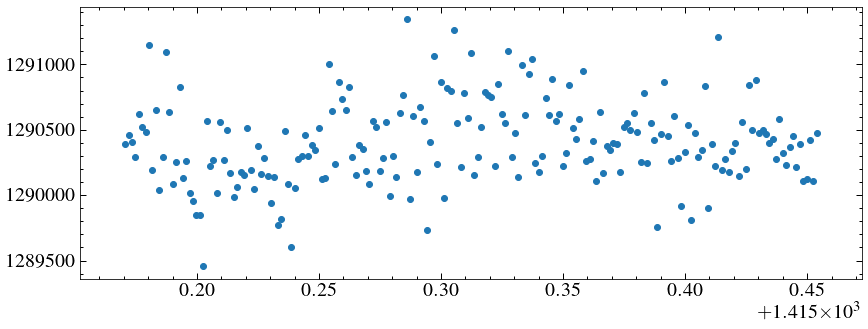

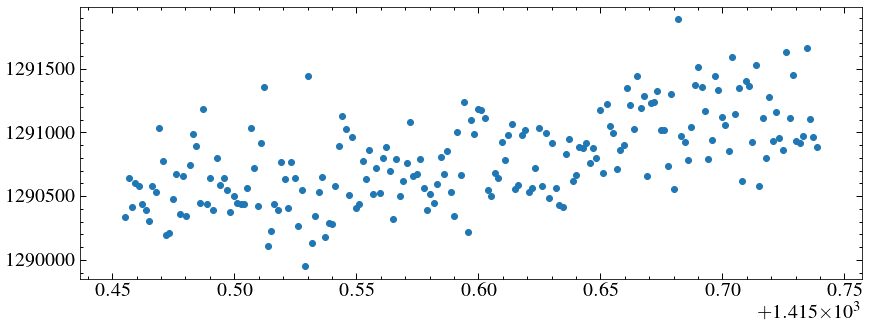

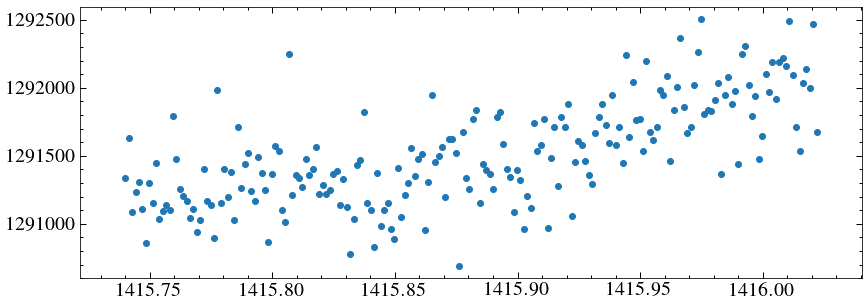

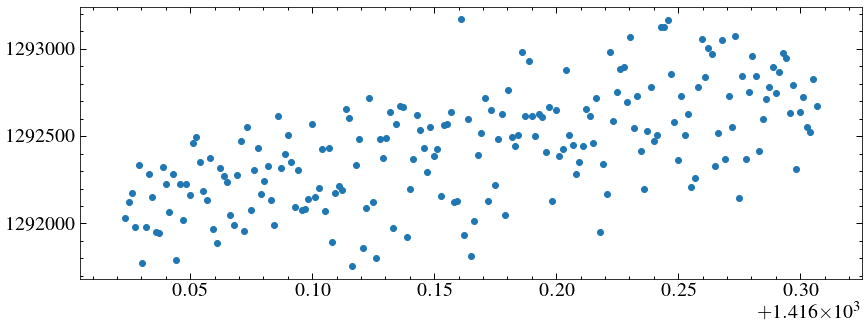

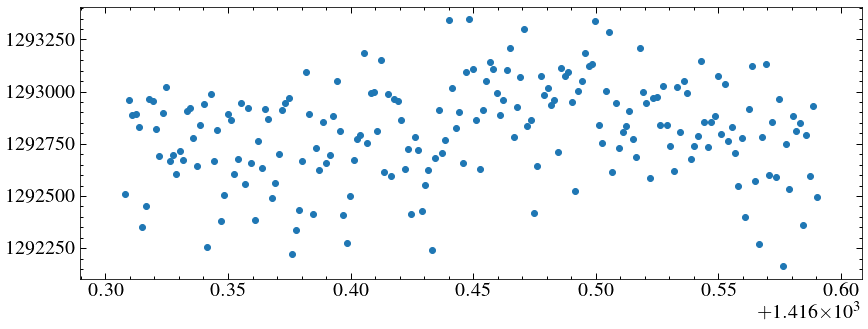

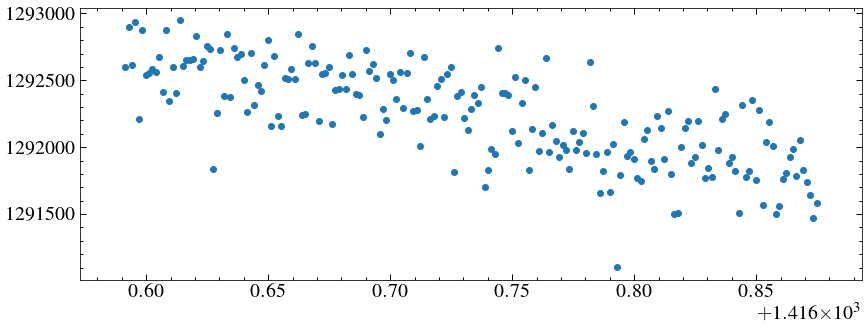

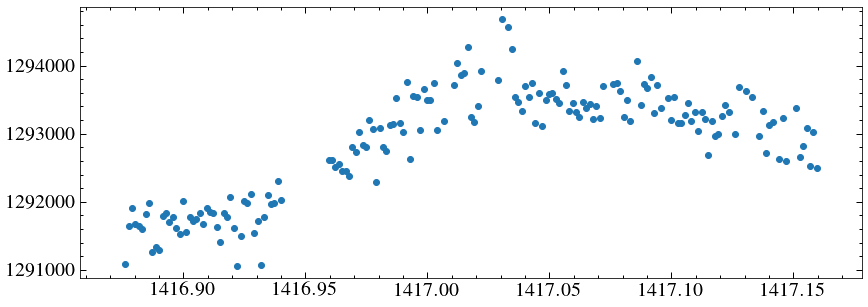

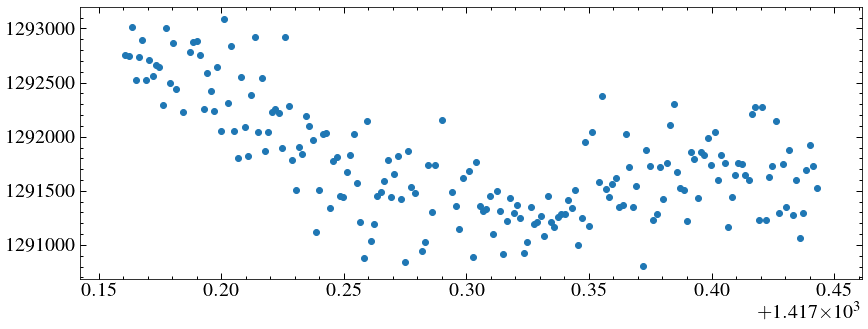

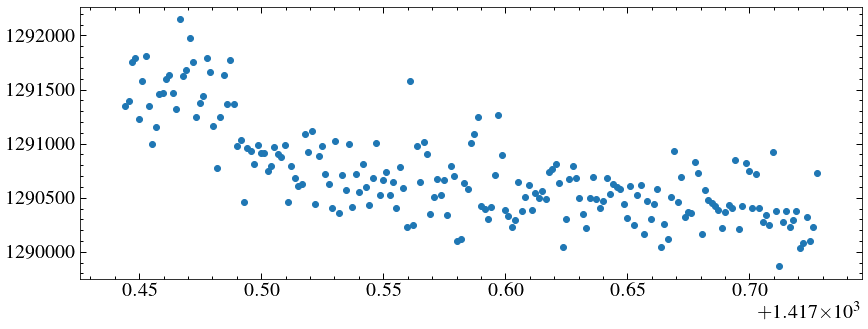

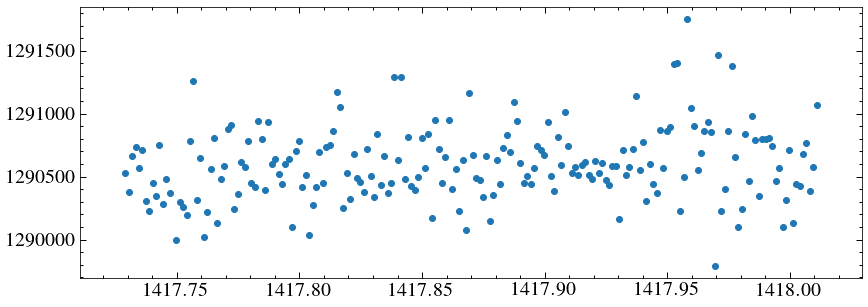

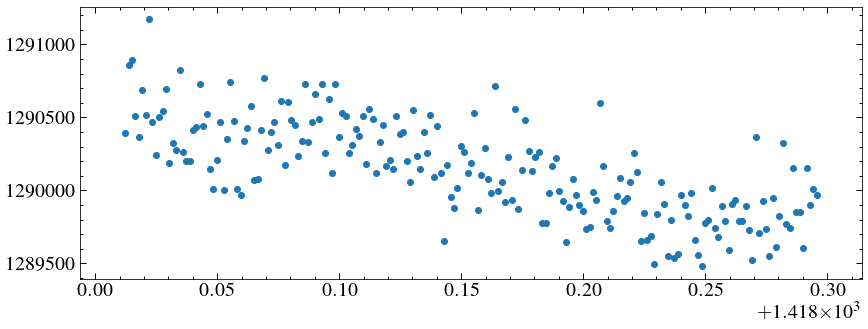

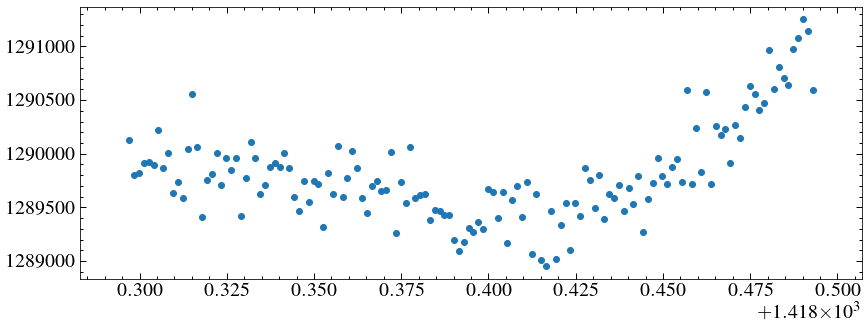

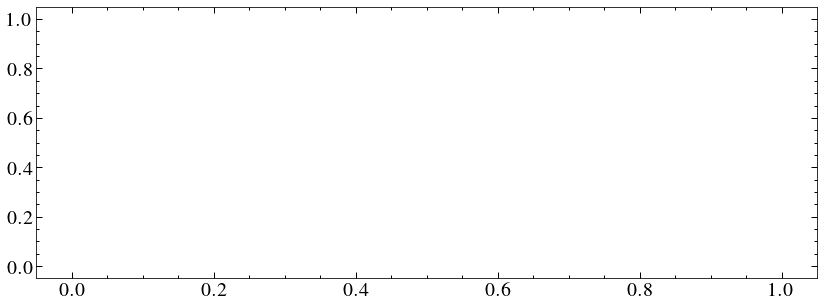

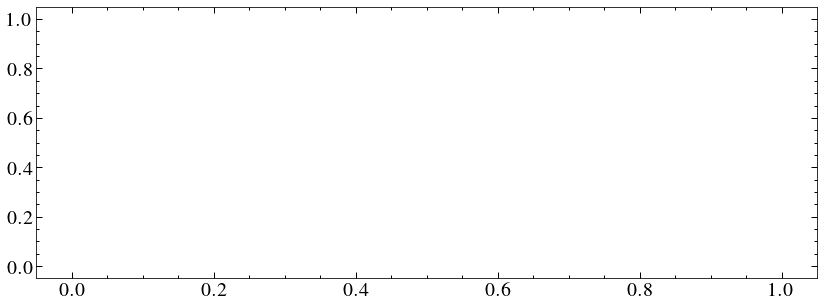

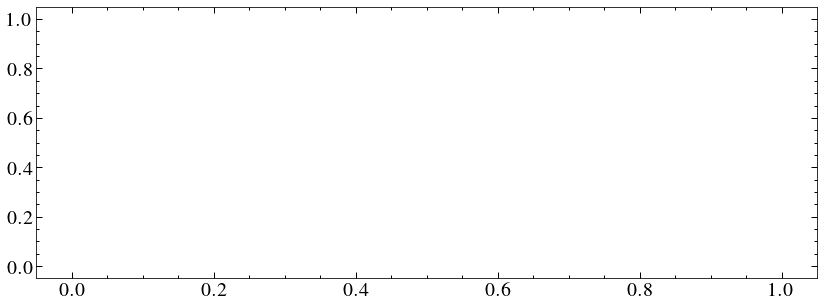

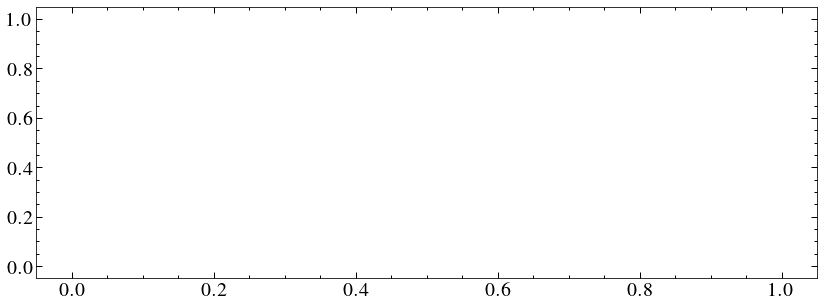

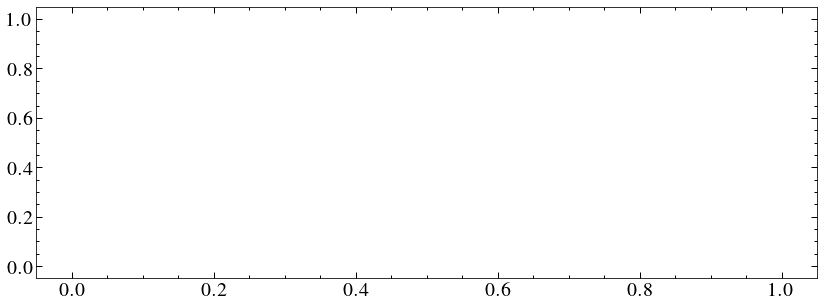

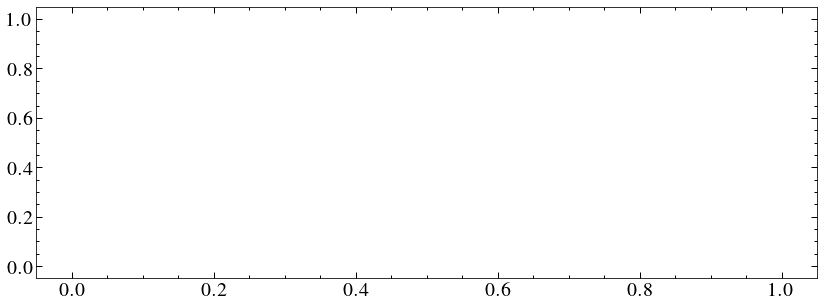

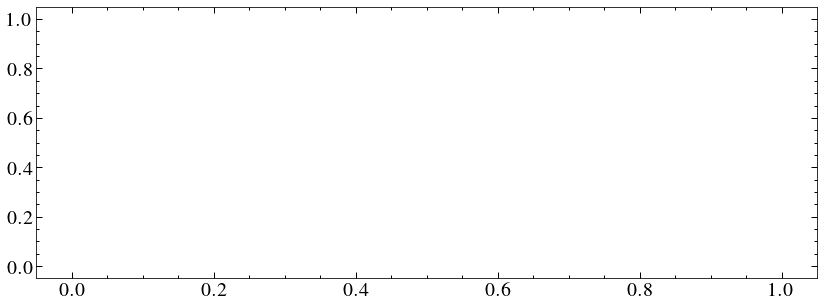

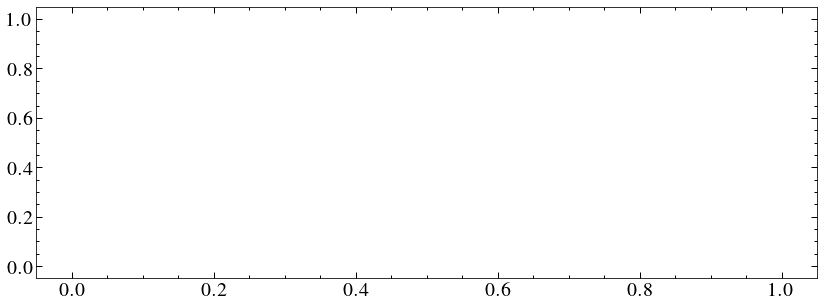

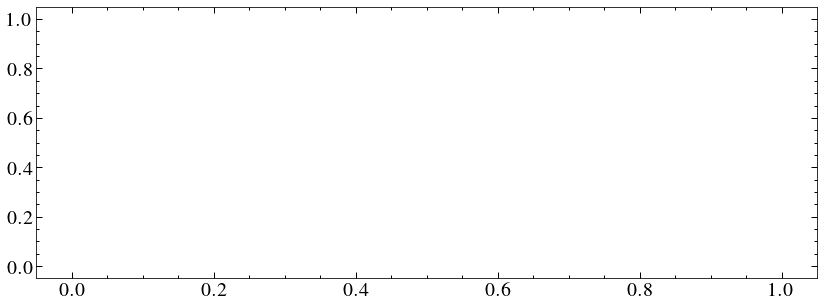

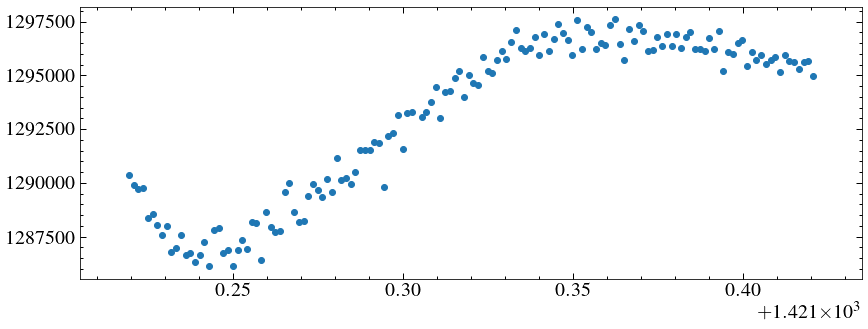

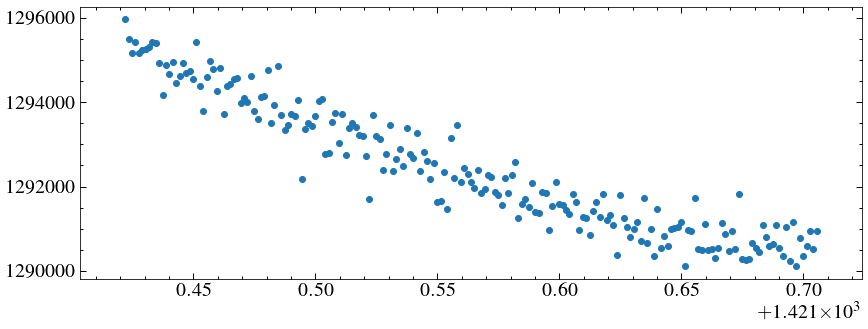

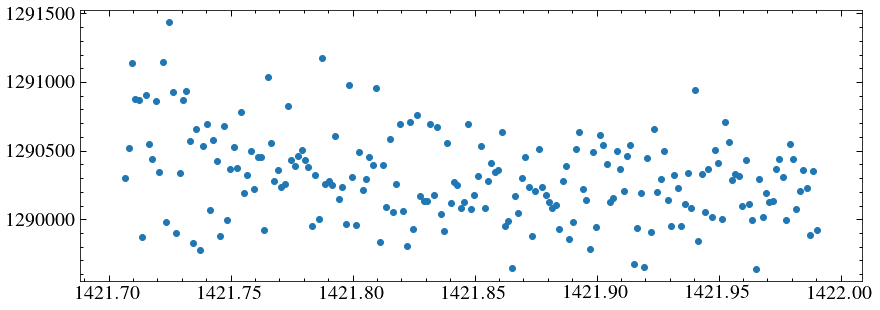

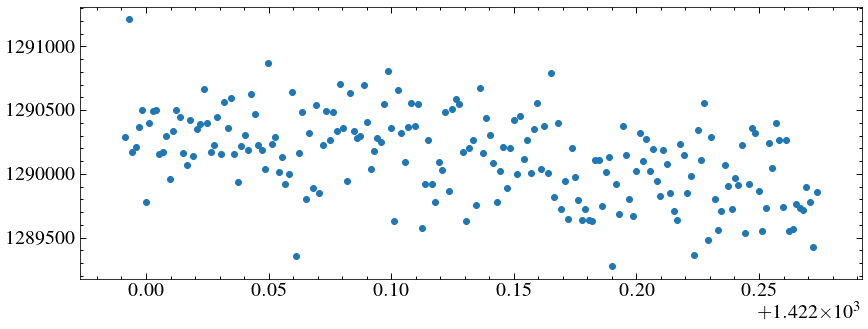

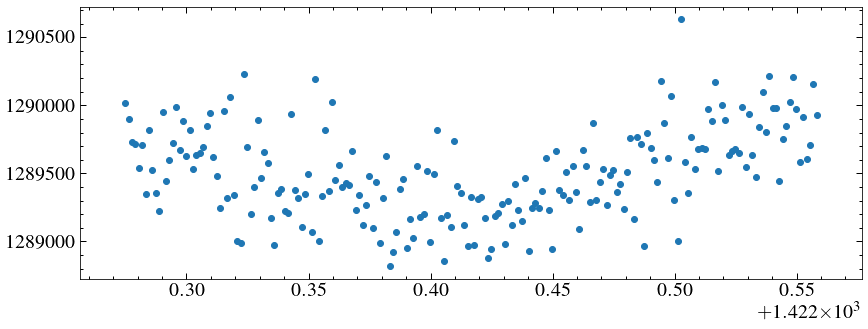

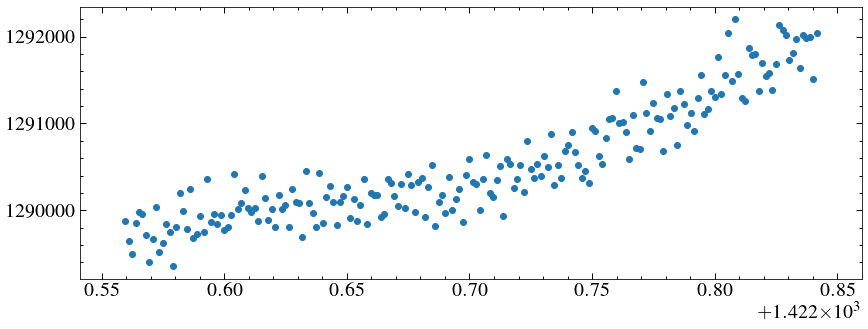

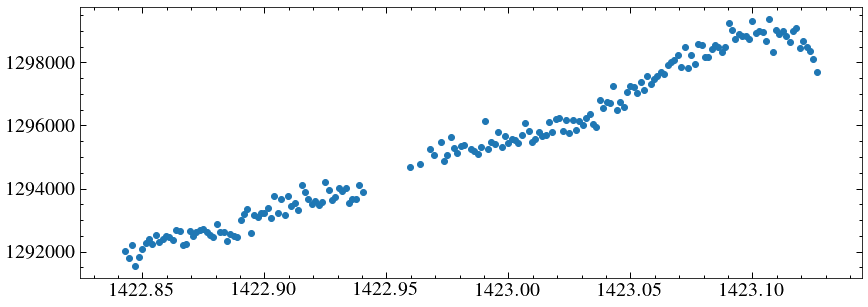

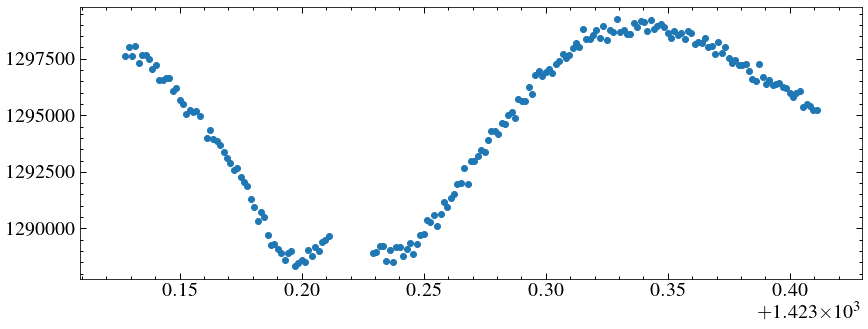

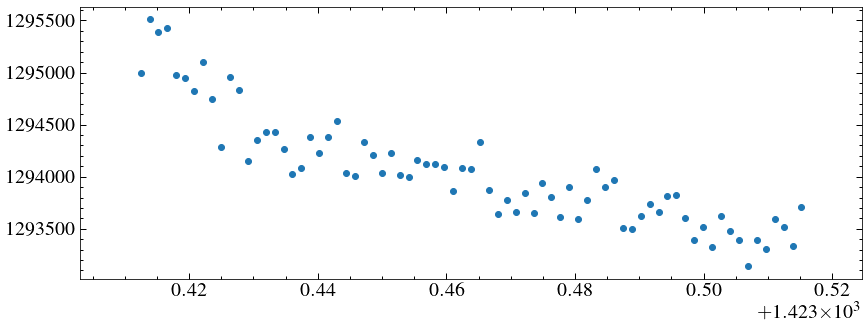

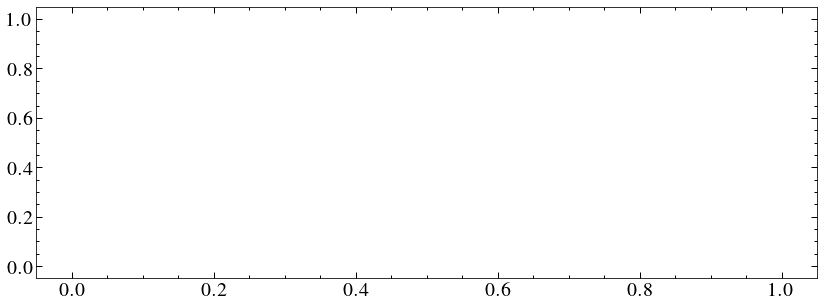

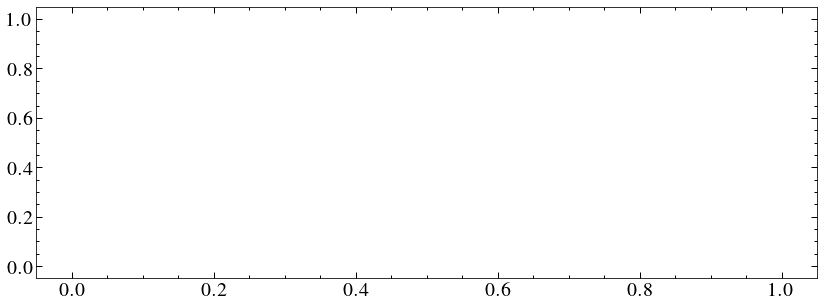

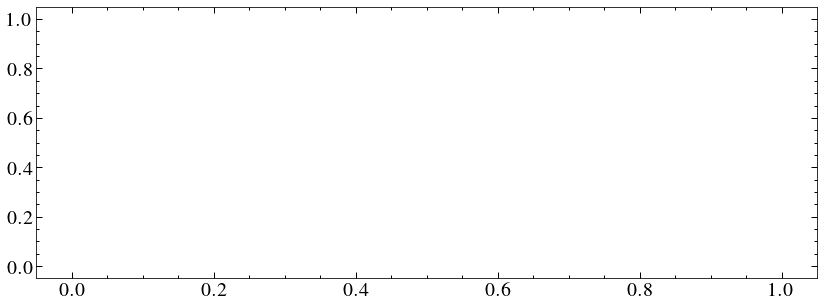

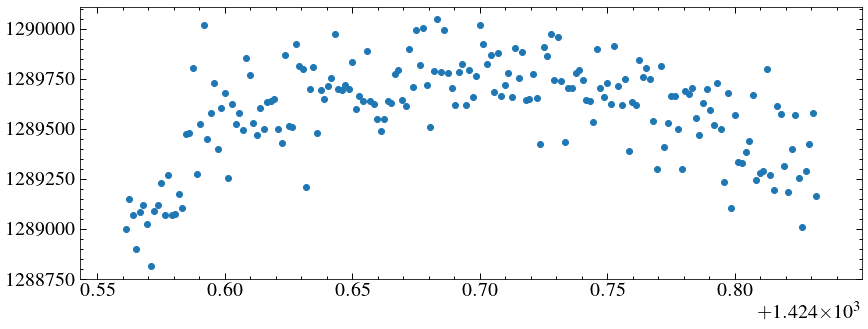

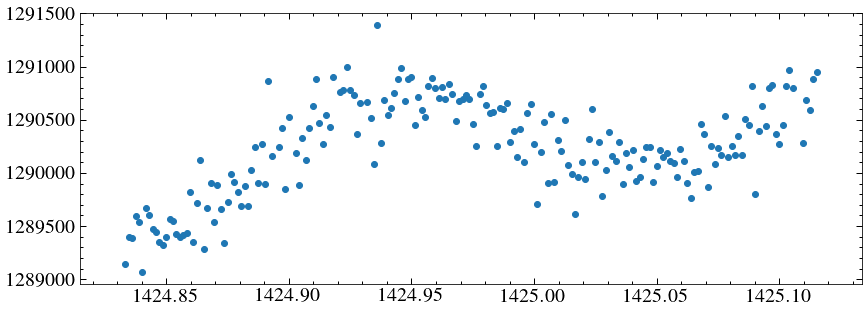

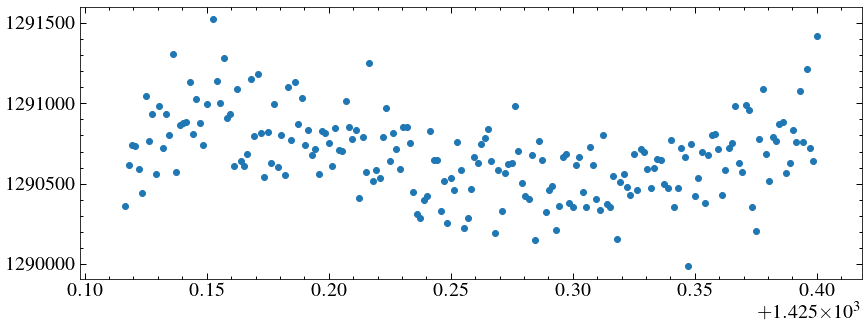

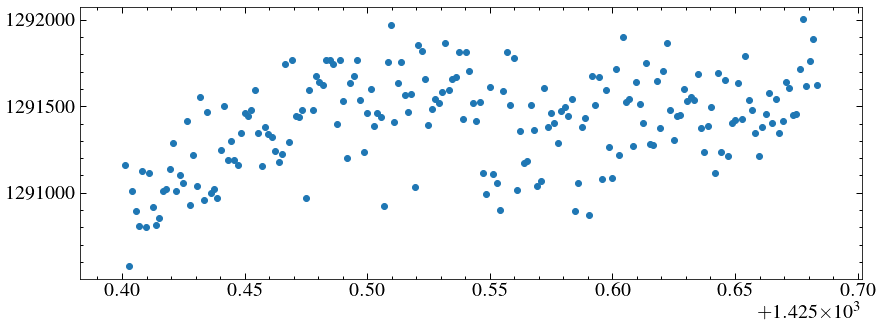

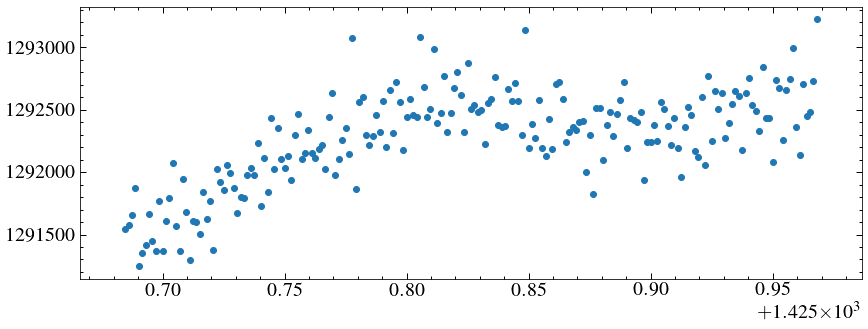

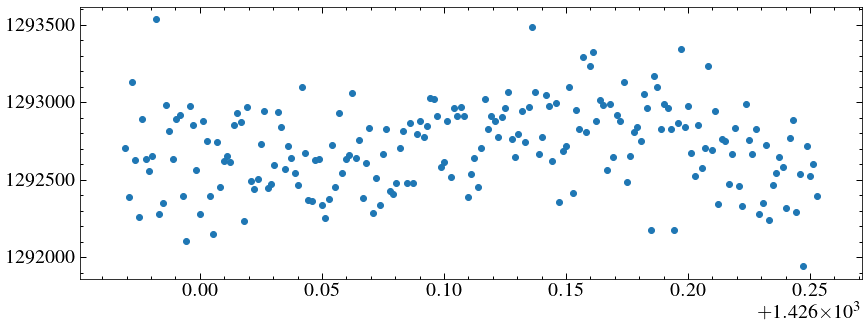

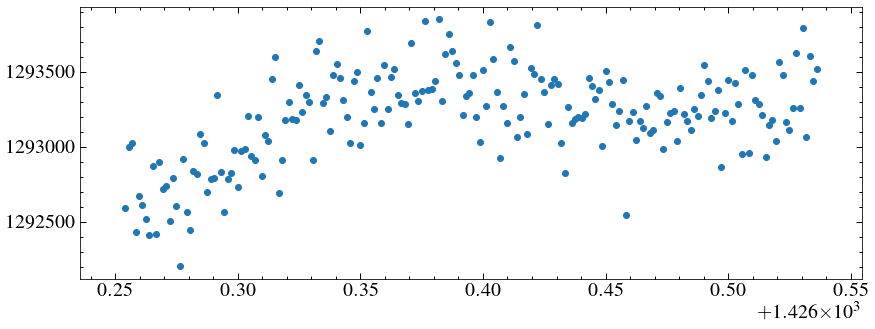

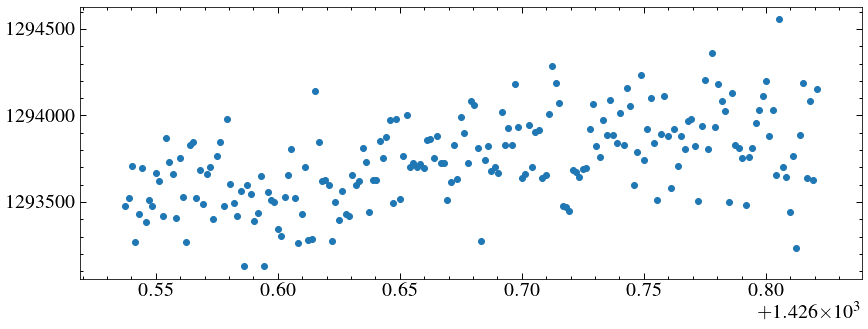

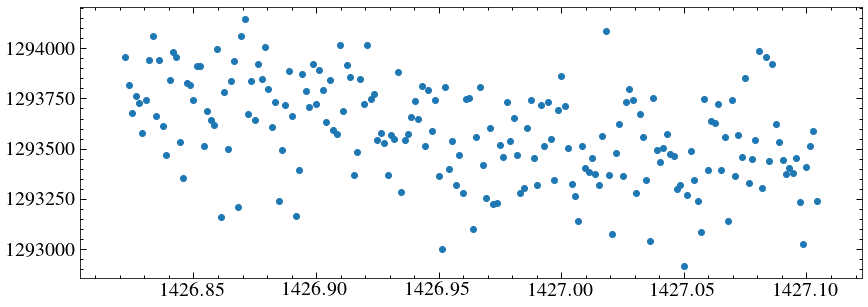

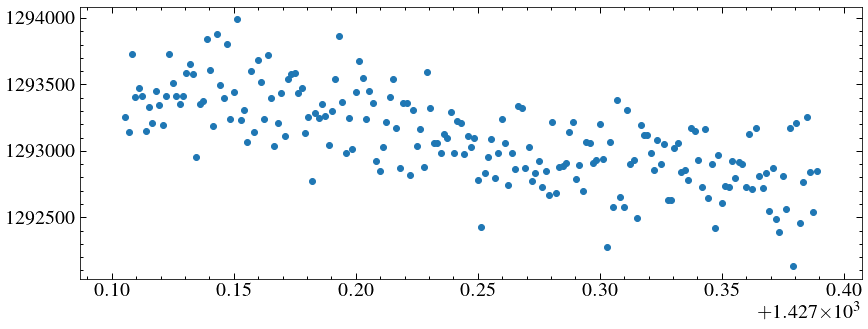

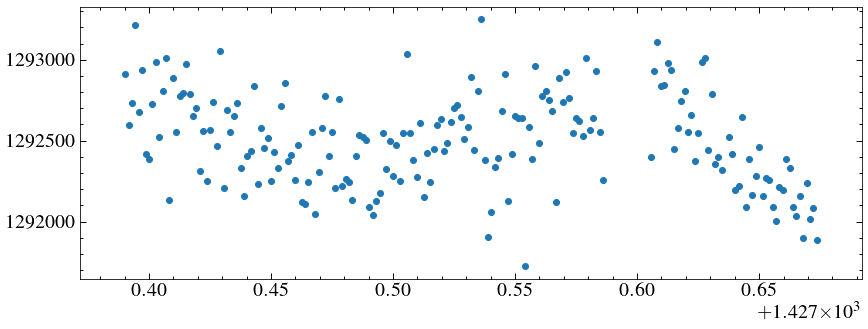

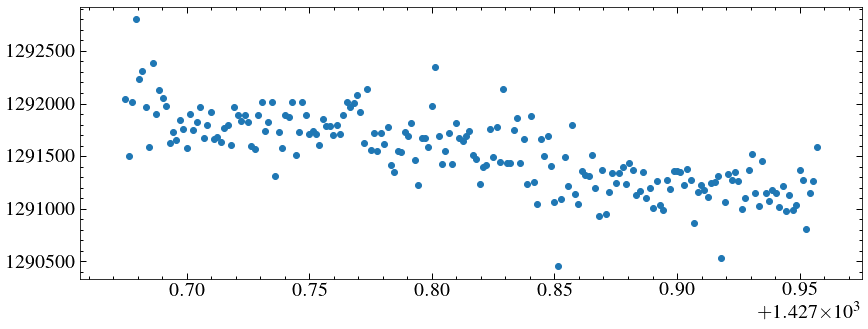

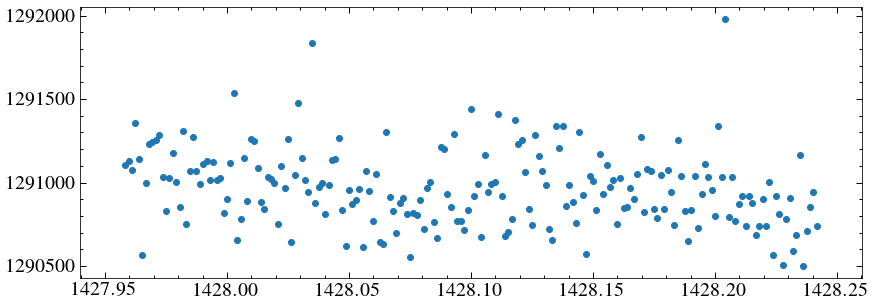

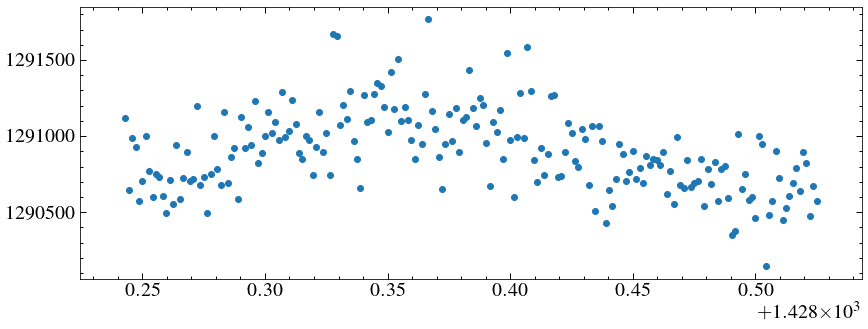

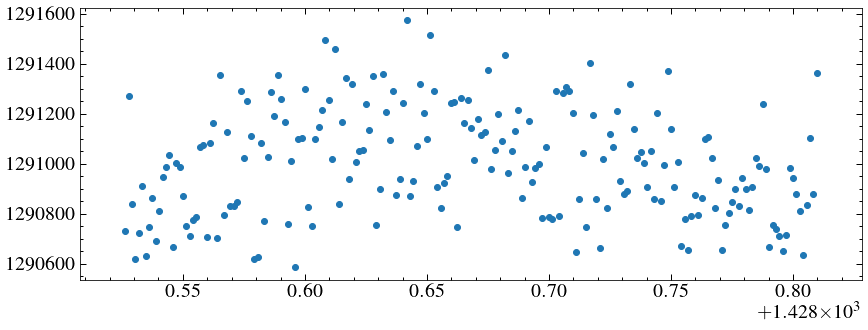

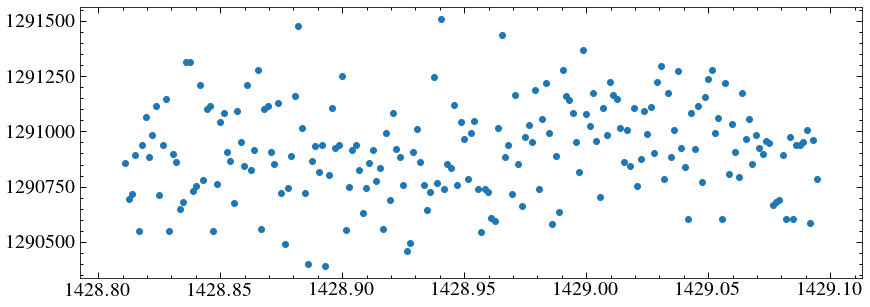

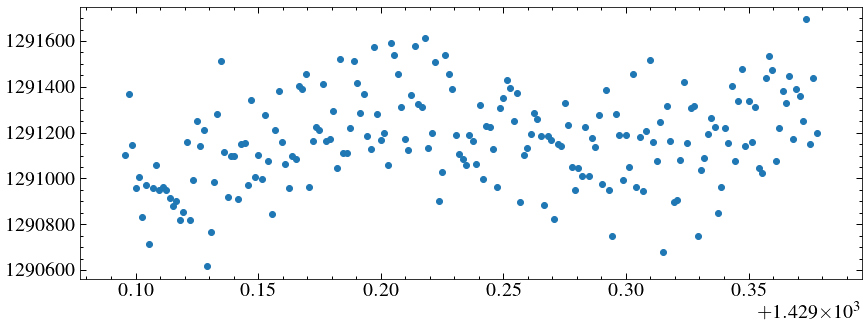

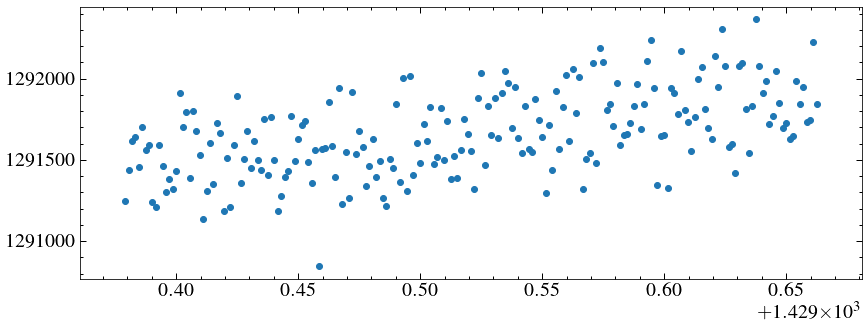

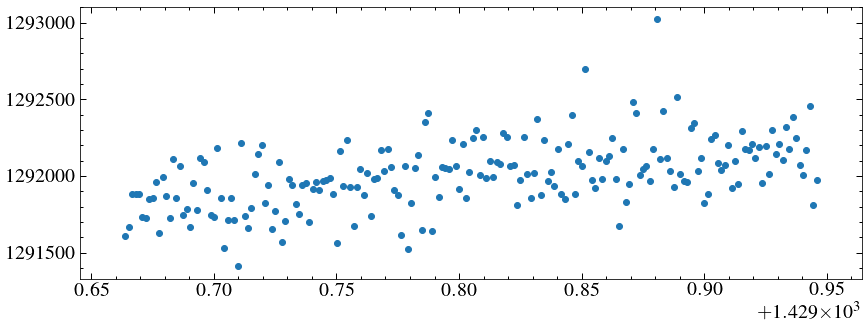

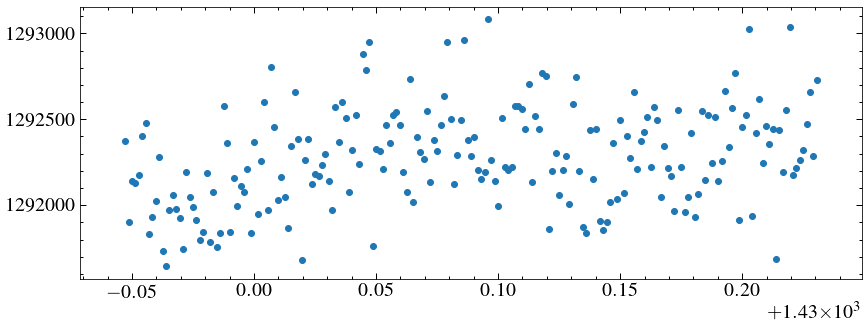

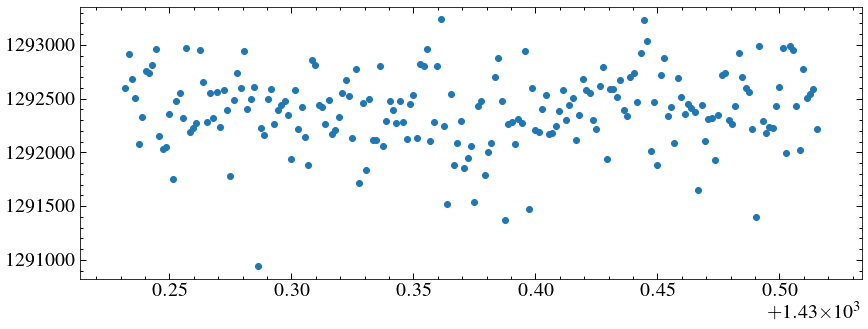

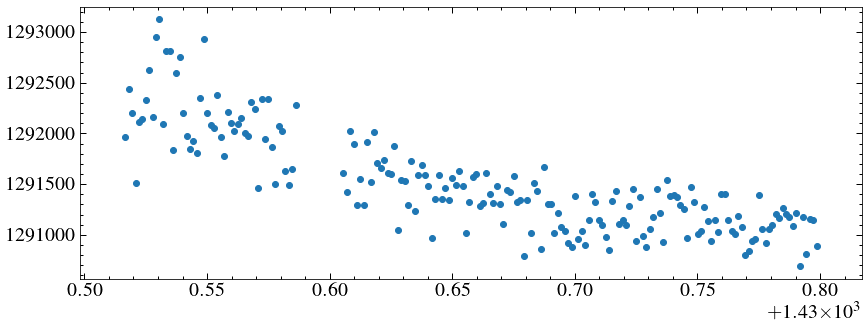

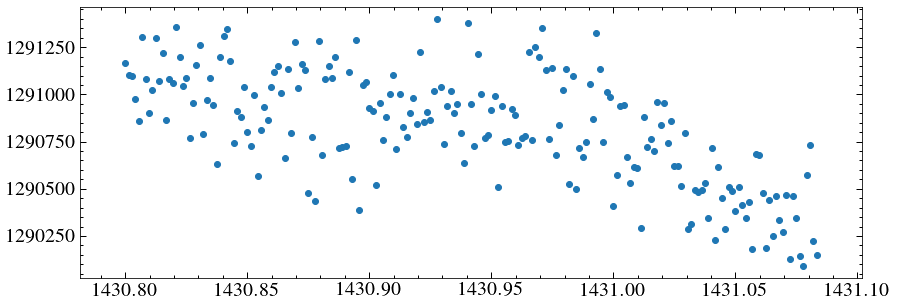

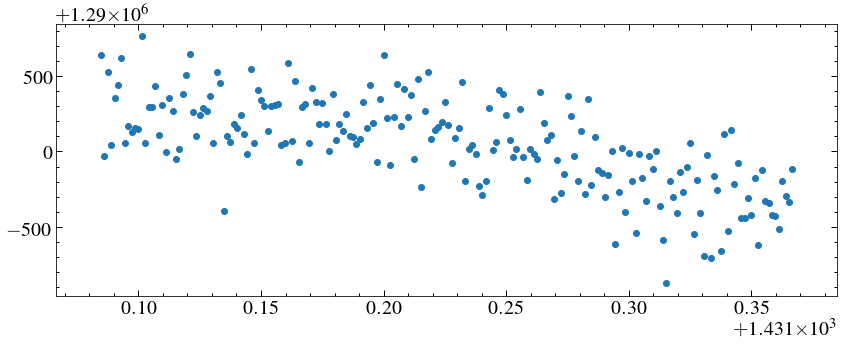

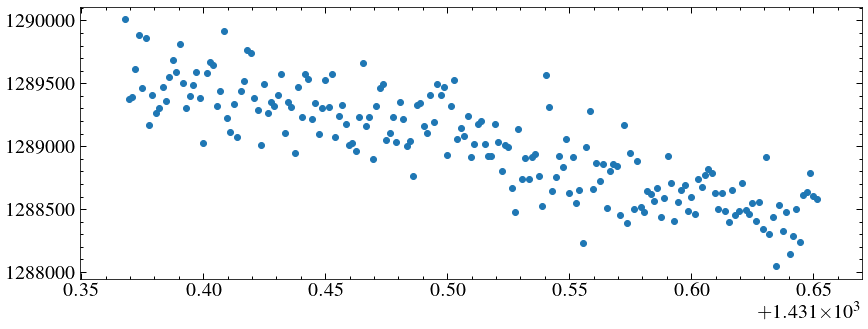

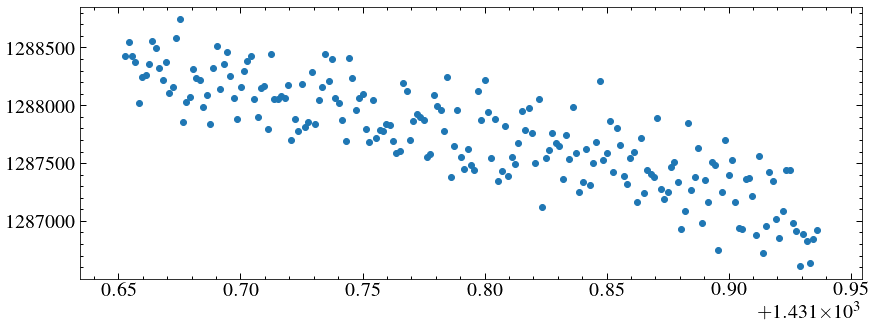

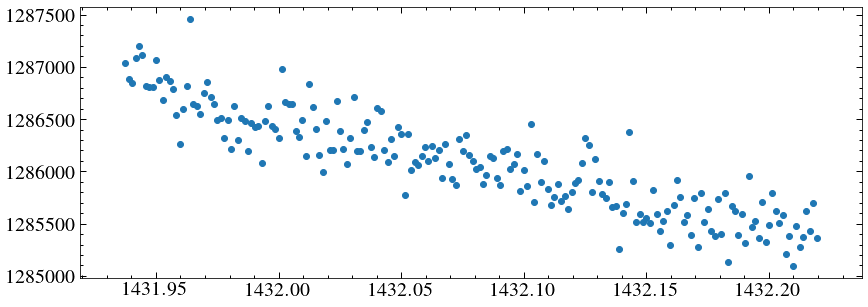

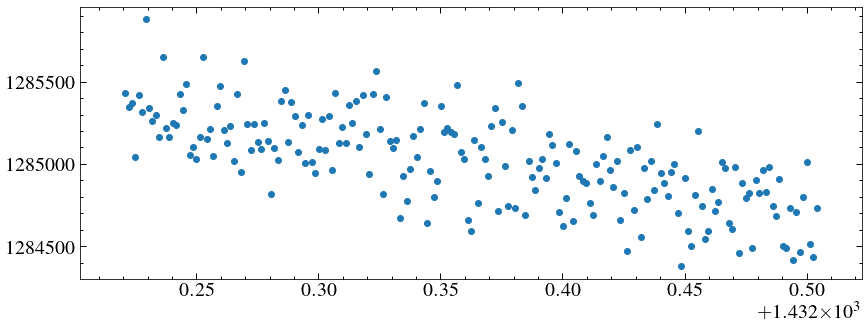

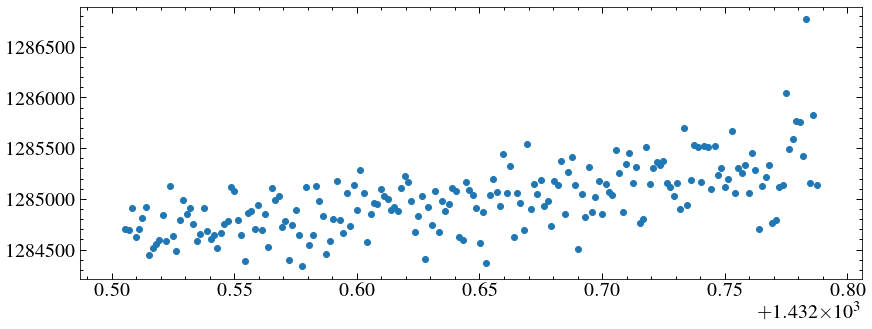

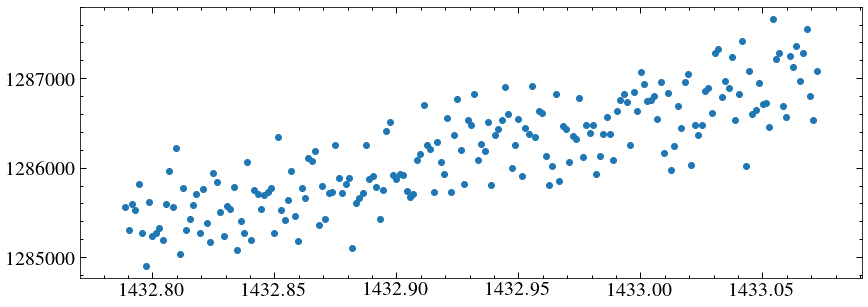

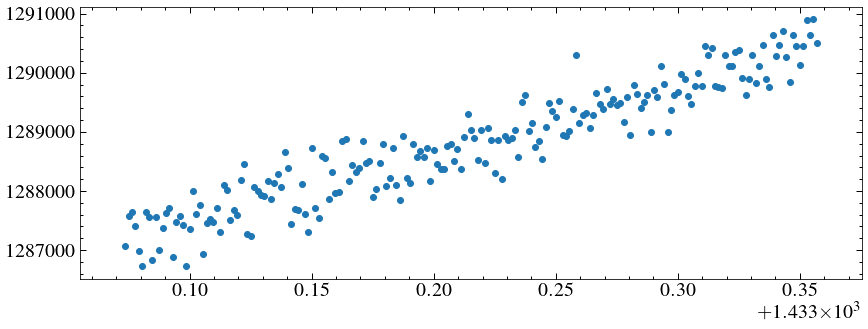

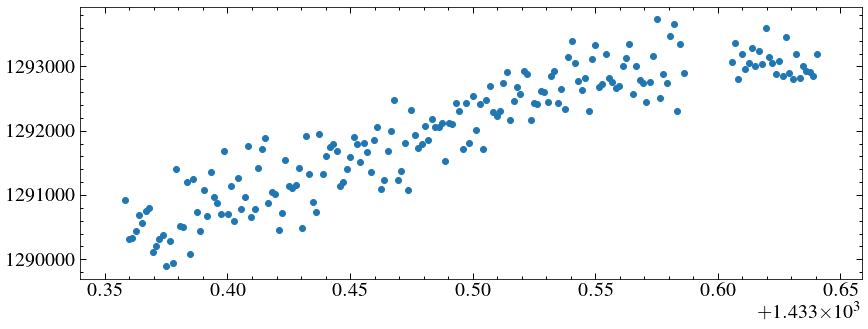

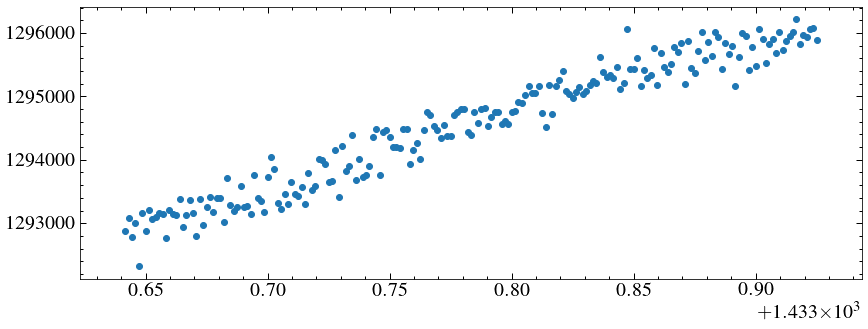

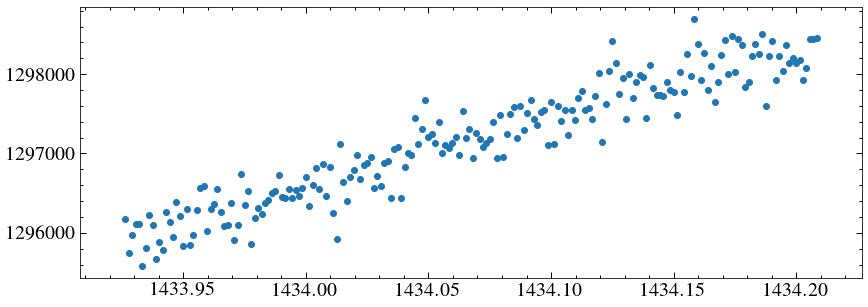

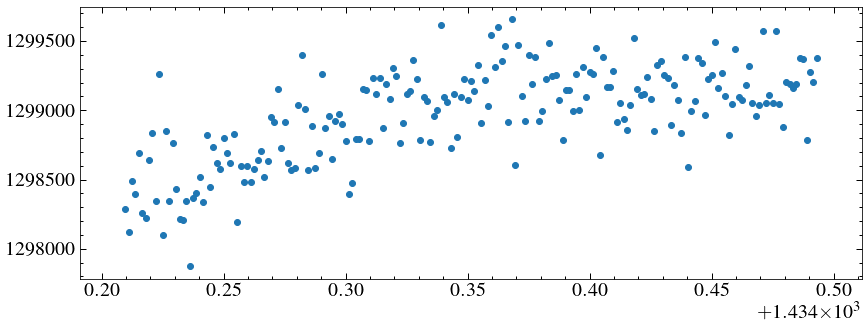

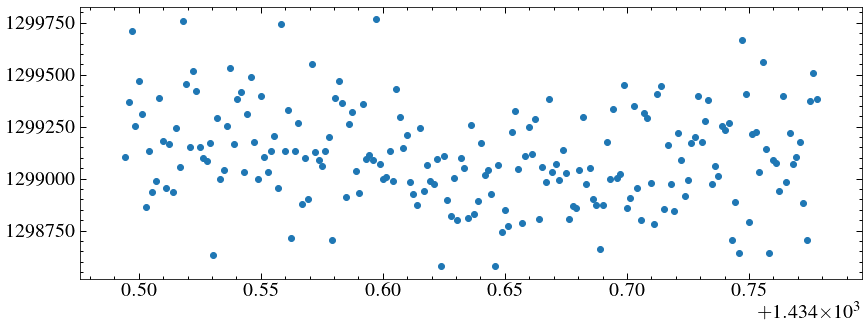

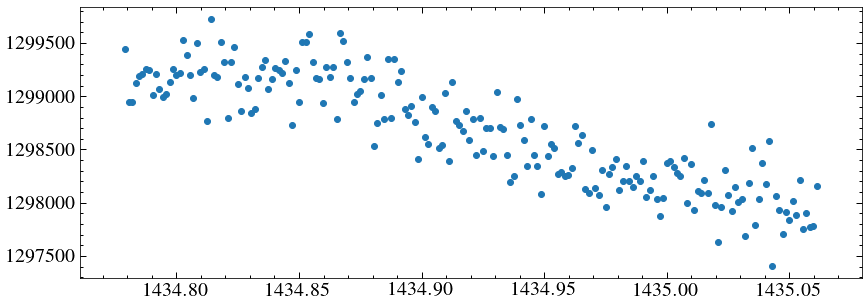

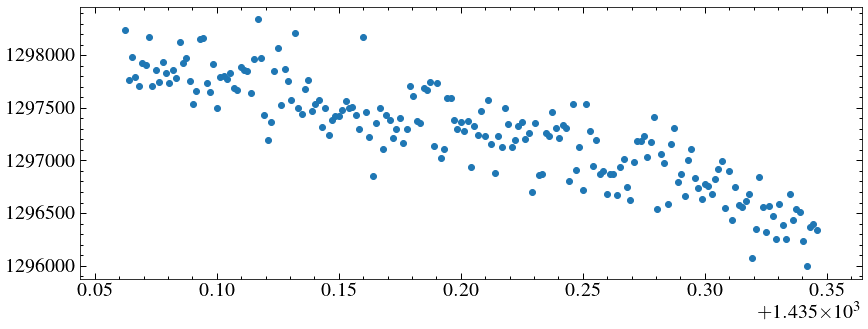

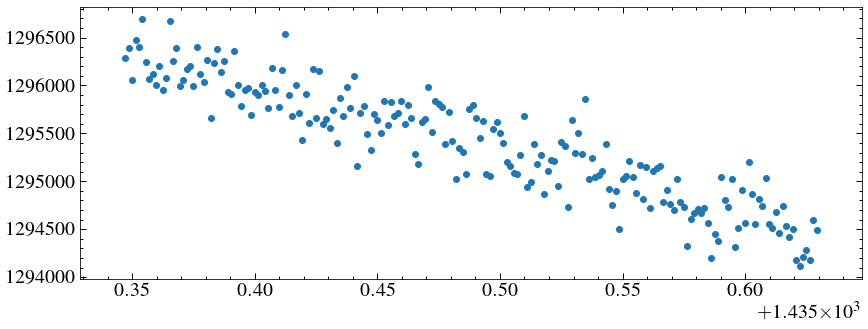

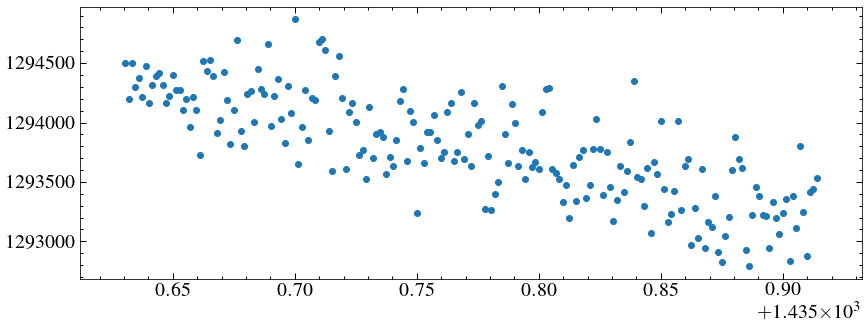

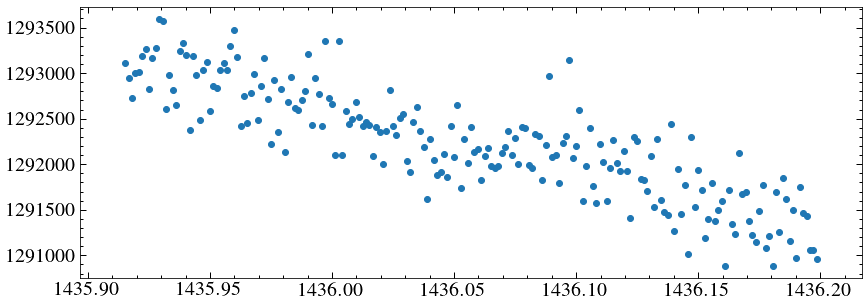

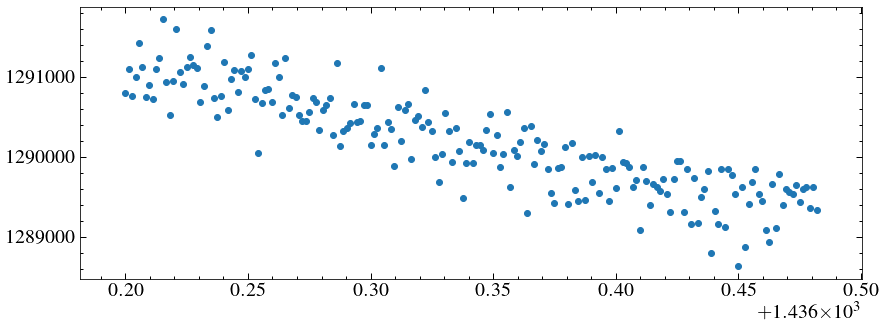

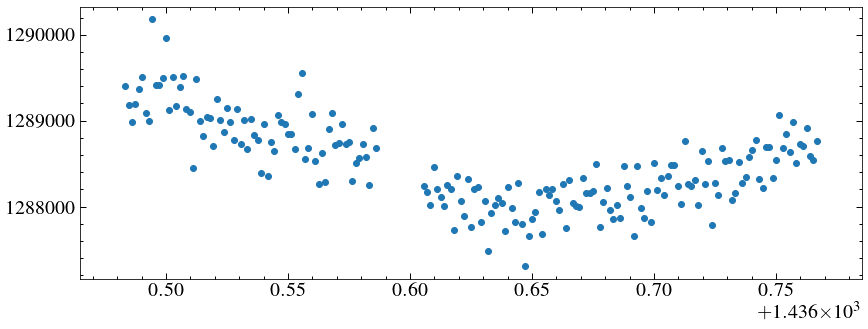

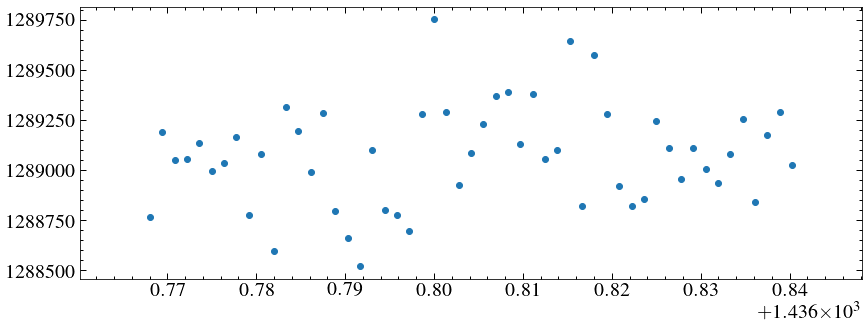

In [33]:
t_start = lc.time[0]
t_max = 0
while t_max < lc.time[-1]:
    t_max = t_start+porb.to(u.day).value
    mask = (lc.time > t_start) & (lc.time < t_max)
    plt.scatter(lc.time[mask], lc.flux[mask])
    plt.show()
    t_start = t_max